In [12]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# file path to csv
TRAIN_CSV_PATH = 'data/train_cleaned.csv'
TEST_CSV_PATH = 'data/test_cleaned.csv'

# Read in the csv file
train_df = pd.read_csv(TRAIN_CSV_PATH)
test_df = pd.read_csv(TEST_CSV_PATH)

In [3]:
# Preview the train data
train_df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Preview th test data (first five rows)
test_df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
train_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
NUMERICAL_COLUMNS = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_weeK']
CATEGORICAL_COLUMNS = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
LABEL = ['income'] 

In [7]:
train_df.income = train_df.income.str.strip()
test_df.income = test_df.income.str.strip()

In [8]:
# Encode training the income which is the label to be O and 1 for binary classification
train_df['income'] = np.where(train_df['income'] == '<=50K',0, 1)

# Encode test data
test_df['income'] = np.where(test_df['income'] == '<=50K',0, 1)

In [9]:
train_df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [10]:
test_df.income.value_counts()

0    12435
1     3846
Name: income, dtype: int64

In [11]:
#train_df.sex.value_counts()
train_df.sex = np.where(train_df.sex == 'Male', 0, 1)
test_df.sex = np.where(test_df.sex == 'Male', 0, 1)

In [12]:
train_df.sex.value_counts()

0    21790
1    10771
Name: sex, dtype: int64

In [13]:
test_df.sex.value_counts()

0    10860
1     5421
Name: sex, dtype: int64

In [14]:
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [15]:
BUCKET_FEATURE = 'age'
NUM_OF_BUCKET = 4
CUSTOM_LABEL = ['young', 'adult', 'middle_age', 'old']

# features to compute vocabulary on
VOCABULARY_FEATURES = ['education', 'relationship', 'marital_status', 'occupation']

transformation_utils = 'transformation/transform_utils.py'

In [16]:
%%writefile {transformation_utils}
import numpy as np
import pandas as pd

def bucketize_with_labels(data, column_name, num_buckets, custom_labels):
    """
     Bcketize a numerical feature with custom labels.

    Args:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the column to be bucketized.
        num_buckets (int): Number of desired buckets.
        custom_labels (list of str): Custom labels for each bucket.

    Returns:
        pd.Series: A new series with bucket labels.
    """
    # Extract the specified column
    column_values = data[column_name]

    # Use pd.qcut to create quantile-based buckets
    bucketized_series = pd.cut(column_values, bins=num_buckets, labels=custom_labels)

    return bucketized_series

def compute_and_apply_vocabulary(df, column):
    """
    Custom function to compute vocabulary and map words to integer indices.

    Args:
        df (DataFrame): pandas data frame.
        column (str): name of the desired feature.
        

    Returns:
        dict: A dictionary mapping unique words to integer indices.
        series: A Panda series of integers
    """
    # Step 1: Extract all words from the documents
    list_of_words = list(df[column])

    # Step 2: Create a vocabulary dictionary
    vocabulary = {}
    for idx, word in enumerate(set(list_of_words)):
        vocabulary[word] = idx

    # Step 3: Replace words in the documents with their corresponding indices
    
    new_list = df[column].replace(vocabulary)

    return new_list, vocabulary


def min_max_scaler(df, column_name):
    """
    Scales a specific column to the range [0, 1].

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the column to be scaled.

    Returns:
        panda.core.series.Series: The DataFrame with the scaled column.
    """
    # Extract the specified column
    column_values = df[column_name].astype('float')

    # Calculate the minimum and maximum values
    min_val = column_values.min()
    max_val = column_values.max()

    # Scale the column to [0, 1]
    scaled_column = (column_values - min_val) / (max_val - min_val)

    return scaled_column

Overwriting transformation/transform_utils.py


In [17]:
from transformation.transform_utils import bucketize_with_labels

age_mapping = {'young':0, 'adult':1, 'middle_age':2, 'old':3}
#j  = bucketize_with_labels(train_df, BUCKET_FEATURE, NUM_OF_BUCKET, CUSTOM_LABEL).replace(age_mapping)
train_df['age'] = bucketize_with_labels(train_df, BUCKET_FEATURE, NUM_OF_BUCKET, CUSTOM_LABEL).replace(age_mapping)
test_df['age'] = bucketize_with_labels(test_df, BUCKET_FEATURE, NUM_OF_BUCKET, CUSTOM_LABEL).replace(age_mapping)

In [18]:
train_df['marital_status'] = train_df['marital_status'].replace({'Married-civ-spouse': 'Married', 'Never-married': 'Single',  
                                                        'Separated':'Divorced', 'Married-spouse-absent' : 'Divorced', 
                                                         'Divorced':'Divorced', 
                                                         'Married-AF-spouse' :'Divorced', 'Widowed':'Widowed'})

# Test
test_df['marital_status'] = test_df['marital_status'].replace({'Married-civ-spouse': 'Married', 'Never-married': 'Single',  
                                                        'Separated':'Divorced', 'Married-spouse-absent' : 'Divorced', 
                                                         'Divorced':'Divorced', 
                                                         'Married-AF-spouse' :'Divorced', 'Widowed':'Widowed'})

In [19]:
train_df.marital_status.value_counts()

Married     14976
Single      10683
Divorced     5909
Widowed       993
Name: marital_status, dtype: int64

In [20]:
test_df.marital_status.value_counts()

Married     7403
Single      5434
Divorced    2919
Widowed      525
Name: marital_status, dtype: int64

In [21]:
# Create Vocabulary for the feature
#occupation_ordered = train_df.groupby(['occupation'])['income'].count().sort_values().index
#occupation_ordered = {k:i for i,k in enumerate(occupation_ordered)}
#occupation_ordered
#train_df['occupation'] = train_df['occupation'].map(occupation_ordered)

In [22]:
from transformation.transform_utils import compute_and_apply_vocabulary

for feature in VOCABULARY_FEATURES:
    train_df[feature], vocab_dict = compute_and_apply_vocabulary(train_df, feature)
    print(f"Training set vocabulary dictionary for {feature}")
    print(vocab_dict)
    print("\n")
    test_df[feature], vocab_ = compute_and_apply_vocabulary(test_df, feature)
    print(f"Test set vocabulary dictionary for {feature}")
    print(vocab_dict)
    print("\n")

Training set vocabulary dictionary for education
{'HS-grad': 0, 'Bachelors': 1, 'Some-college': 2, '10th': 3, '1st-4th': 4, '7th-8th': 5, 'Assoc-acdm': 6, 'Masters': 7, '5th-6th': 8, '12th': 9, 'Preschool': 10, 'Assoc-voc': 11, 'Doctorate': 12, '11th': 13, 'Prof-school': 14, '9th': 15}


Test set vocabulary dictionary for education
{'HS-grad': 0, 'Bachelors': 1, 'Some-college': 2, '10th': 3, '1st-4th': 4, '7th-8th': 5, 'Assoc-acdm': 6, 'Masters': 7, '5th-6th': 8, '12th': 9, 'Preschool': 10, 'Assoc-voc': 11, 'Doctorate': 12, '11th': 13, 'Prof-school': 14, '9th': 15}


Training set vocabulary dictionary for relationship
{'Unmarried': 0, 'Husband': 1, 'Other-relative': 2, 'Wife': 3, 'Not-in-family': 4, 'Own-child': 5}


Test set vocabulary dictionary for relationship
{'Unmarried': 0, 'Husband': 1, 'Other-relative': 2, 'Wife': 3, 'Not-in-family': 4, 'Own-child': 5}


Training set vocabulary dictionary for marital_status
{'Widowed': 0, 'Divorced': 1, 'Married': 2, 'Single': 3}


Test set vo

In [23]:
train_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,State-gov,77516,1,13,3,4,4,White,0,2174,0,40,United-States,0
1,1,Self-emp-not-inc,83311,1,13,2,1,1,White,0,0,0,13,United-States,0
2,1,Private,215646,0,9,1,9,4,White,0,0,0,40,United-States,0
3,1,Private,234721,13,7,2,9,1,Black,0,0,0,40,United-States,0
4,0,Private,338409,1,13,2,2,3,Black,1,0,0,40,Cuba,0
5,1,Private,284582,7,14,2,1,3,White,1,0,0,40,United-States,0
6,1,Private,160187,15,5,1,6,4,Black,1,0,0,16,Jamaica,0
7,1,Self-emp-not-inc,209642,0,9,2,1,1,White,0,0,0,45,United-States,1
8,0,Private,45781,7,14,3,2,4,White,1,14084,0,50,United-States,1
9,1,Private,159449,1,13,2,1,1,White,0,5178,0,40,United-States,1


In [24]:
# Features to encode zero and one because a very high percentage of the data is more than the rest
features_to_encode = ['workclass', 'native_country', 'race']

In [25]:
# Transform workclass feature to be 1 if the workclass is Private and 0 if it isn't
train_df['workclass'] = np.where(train_df['workclass'] == 'Private',1,0)

# Transform native_country feature to be 1 if the native country is United-States and 0 if it isn't
train_df['native_country'] = np.where(train_df['native_country'] == 'United-States',1,0)

# Transform race feature to be 1 if the race is White and 0 if it isn't
train_df['race'] = np.where(train_df['race'] == 'White',1,0)

In [26]:
# Test set
# Transform workclass feature to be 1 if the workclass is Private and 0 if it isn't
test_df['workclass'] = np.where(test_df['workclass'] == 'Private',1,0)

# Transform native_country feature to be 1 if the native country is United-States and 0 if it isn't
test_df['native_country'] = np.where(test_df['native_country'] == 'United-States',1,0)

# Transform race feature to be 1 if the race is White and 0 if it isn't
test_df['race'] = np.where(test_df['race'] == 'White',1,0)

In [27]:
train_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,0,77516,1,13,3,4,4,1,0,2174,0,40,1,0
1,1,0,83311,1,13,2,1,1,1,0,0,0,13,1,0
2,1,1,215646,0,9,1,9,4,1,0,0,0,40,1,0
3,1,1,234721,13,7,2,9,1,0,0,0,0,40,1,0
4,0,1,338409,1,13,2,2,3,0,1,0,0,40,0,0
5,1,1,284582,7,14,2,1,3,1,1,0,0,40,1,0
6,1,1,160187,15,5,1,6,4,0,1,0,0,16,0,0
7,1,0,209642,0,9,2,1,1,1,0,0,0,45,1,1
8,0,1,45781,7,14,3,2,4,1,1,14084,0,50,1,1
9,1,1,159449,1,13,2,1,1,1,0,5178,0,40,1,1


In [28]:
train_df.age.value_counts()

0    14925
1    12713
2     4455
3      468
Name: age, dtype: int64

In [29]:
test_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,1,226802,13,7,3,3,5,0,0,0,0,40,1,0
1,1,1,89814,0,9,2,4,1,1,0,0,0,50,1,0
2,0,0,336951,6,12,2,6,1,1,0,0,0,40,1,1
3,1,1,160323,2,10,2,3,1,0,0,7688,0,40,1,1
4,0,0,103497,2,10,3,10,5,1,1,0,0,30,1,0
5,0,1,198693,3,6,3,7,4,1,0,0,0,30,1,0
6,0,0,227026,0,9,3,10,0,0,0,0,0,40,1,0
7,2,0,104626,14,15,2,2,1,1,0,3103,0,32,1,1
8,0,1,369667,2,10,3,7,0,1,1,0,0,40,1,0
9,2,1,104996,5,4,2,14,1,1,0,0,0,10,1,0


In [30]:
from transformation import transform_utils


In [32]:
column_names = list(train_df.columns)
for column in column_names:
    train_df[column] = transform_utils.min_max_scaler(train_df, column)
    test_df[column] = transform_utils.min_max_scaler(test_df, column)

In [33]:
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.333333,0.0,0.044302,0.066667,0.800000,1.000000,0.285714,0.8,1.0,0.0,0.02174,0.0,0.397959,1.0,0.0
1,0.333333,0.0,0.048238,0.066667,0.800000,0.666667,0.071429,0.2,1.0,0.0,0.00000,0.0,0.122449,1.0,0.0
2,0.333333,1.0,0.138113,0.000000,0.533333,0.333333,0.642857,0.8,1.0,0.0,0.00000,0.0,0.397959,1.0,0.0
3,0.333333,1.0,0.151068,0.866667,0.400000,0.666667,0.642857,0.2,0.0,0.0,0.00000,0.0,0.397959,1.0,0.0
4,0.000000,1.0,0.221488,0.066667,0.800000,0.666667,0.142857,0.6,0.0,1.0,0.00000,0.0,0.397959,0.0,0.0


In [35]:
train_df.to_csv('data/train1.csv', index=False)

In [38]:
test_df.to_csv('data/test1.csv', index = False)

### Feature Selection

In [ ]:
# See to it that you select great features. See the impact on the model.
# Use undersampling and oversampling.
# Save new features 

In [3]:
import xgboost as xgb
import pandas as pd

In [4]:
df_train =  pd.read_csv('data/train1.csv')
df_test = pd.read_csv('data/test1.csv')

In [5]:
X_train = df_train.drop('income', axis = 1 )
y_train = df_train['income']
X_test = df_test.drop('income', axis =1 )
y_test = df_test['income']

In [6]:
# Instantiate the model
xgb_model = xgb.XGBClassifier()
# Fit the X's to the y's
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [7]:
xgb_model.feature_importances_

array([0.04143899, 0.01383113, 0.01169635, 0.01132331, 0.12048181,
       0.25467604, 0.04396063, 0.22542183, 0.01238993, 0.02356051,
       0.14963321, 0.05035778, 0.02290599, 0.01832248], dtype=float32)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_11156\56261752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=feat_importances.index, y=feat_importances.values ,edgecolor='k', palette='Set2')
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_11156\56261752.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


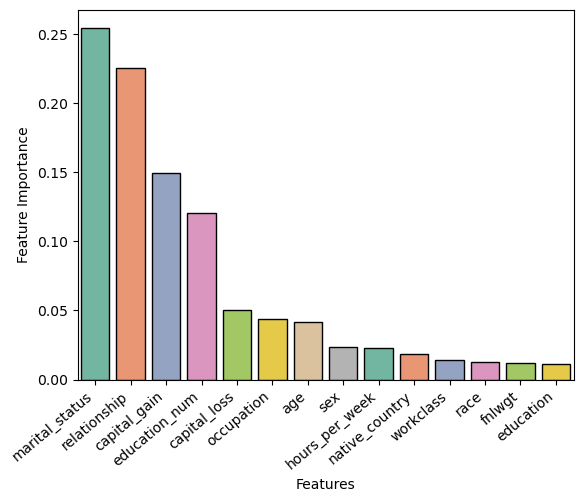

In [13]:
import seaborn as sns
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.nlargest(X_train.shape[1])
ax=sns.barplot(x=feat_importances.index, y=feat_importances.values ,edgecolor='k', palette='Set2')
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
#feat_importances.sor

In [10]:
feat_importances.sort_values()

education         0.011323
fnlwgt            0.011696
race              0.012390
workclass         0.013831
native_country    0.018322
hours_per_week    0.022906
sex               0.023561
age               0.041439
occupation        0.043961
capital_loss      0.050358
education_num     0.120482
capital_gain      0.149633
relationship      0.225422
marital_status    0.254676
dtype: float32